In [8]:
import numpy as np
import pickle 
import os
import matplotlib.pyplot as plt

In [17]:
SRC_PATH = os.path.realpath('../results/different_depth/stats.pkl')
print(SRC_PATH)
with open(SRC_PATH, 'rb') as f:
    data = pickle.load(f)
data.keys(), len(data['black_z'])

C:\Users\kevin\projects\16823-project\results\different_depth\stats.pkl


(dict_keys(['errors', 'perblock_estimates', 'black_z', 'white_z', 'is_black']),
 8)

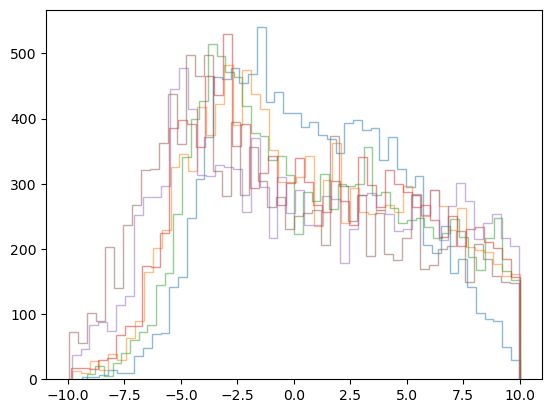

In [16]:
dropped_frames = [1, 5] # error too high
for idx, (black_z, white_z) in enumerate(zip(data['black_z'], data['white_z'])):
    if idx in dropped_frames:
        continue
    plt.hist(black_z, bins=50, alpha=0.5, histtype='step')

In [18]:
SRC_PATH = os.path.realpath('../results/varying_albedo_2/stats.pkl')
print(SRC_PATH)
with open(SRC_PATH, 'rb') as f:
    data = pickle.load(f)
data.keys(), len(data['black_z'])

C:\Users\kevin\projects\16823-project\results\varying_albedo_2\stats.pkl


(dict_keys(['errors', 'perblock_estimates', 'black_z', 'white_z', 'is_black']),
 24)

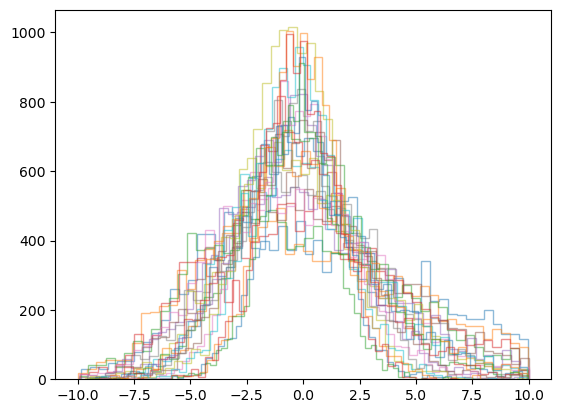

In [19]:
dropped_frames = [] # error too high
for idx, (black_z, white_z) in enumerate(zip(data['black_z'], data['white_z'])):
    if idx in dropped_frames:
        continue
    plt.hist(black_z, bins=50, alpha=0.5, histtype='step')